# Predicting Terrorism / Bayesian Inference

## About the Dataset

From Kaggle:
> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2015 (with annual updates planned for the future). The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 150,000 cases. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the [University of Maryland](http://start.umd.edu/gtd/). 

> Geography: Worldwide

> Time period: 1970-2015, except 1993 (2016 in progress, publication expected June 2017)

> Unit of analysis: Attack

> Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

> Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

> Definition of terrorism:

> "The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

The [codebook](http://start.umd.edu/gtd/downloads/Codebook.pdf) that functions as a data dictionary.

This [2007 paper by LaFree (UMD)](https://ccjs.umd.edu/sites/ccjs.umd.edu/files/pubs/FTPV_A_224594.pdf) introduces the dataset very well.

## Goal

The structure of this project includes three components: exploratory data analysis, Bayesian inference to examine the the difference in incidences across the globe, and a model to impute the missing values for the number of bombings/explosions in 1993. 


### Part One: EDA

You should gain an understanding of the attacks (focus on `attacktype1`), their distribution across the world, and their frequency.

You will discover different things than your classmates on this portion. Your presentation should include compelling visualizations describing terror incidents around the world.

In [49]:
import pandas as pd
data = pd.read_excel('/Users/rowan/Desktop/GTD_0616dist/globalterrorismdb_0616dist.xlsx')

In [44]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
def eda(dataframe): #Ritkas code chunk to check quality of data
    print "missing values \n", dataframe.isnull().sum() #shows total amount of null values for each column
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape     
    print "dataframe describe \n", dataframe.describe()
    print "dataframe length =", len(dataframe) #length of the dataframe
    print "duplicates", dataframe.duplicated().sum() # added this to duplicates in the data
    for item in dataframe:
        print item
        print dataframe[item].nunique()
        
eda(data)

missing values 
eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            152016
extended                   0
resolution            153270
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14520
city                     446
latitude                4519
longitude               4519
specificity                0
vicinity                   0
location              114561
summary                66140
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           132536
alternative_txt            0
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            100420
propextent_txt             0
propvalue             12546

11682
guncertain1
2
guncertain2
2
guncertain3
2
nperps
113
nperpcap
50
claimed
4
claimmode
11
claimmode_txt
12
claim2
3
claimmode2
9
claimmode2_txt
10
claim3
2
claimmode3
8
claimmode3_txt
9
compclaim
3
weaptype1
12
weaptype1_txt
12
weapsubtype1
28
weapsubtype1_txt
29
weaptype2
11
weaptype2_txt
12
weapsubtype2
26
weapsubtype2_txt
27
weaptype3
10
weaptype3_txt
11
weapsubtype3
22
weapsubtype3_txt
23
weaptype4
5
weaptype4_txt
6
weapsubtype4
16
weapsubtype4_txt
17
weapdetail
16987
nkill
338
nkillus
30
nkillter
133
nwound
376
nwoundus
43
nwoundte
64
property
3
propextent
4
propextent_txt
5
propvalue
604
propcomment
17459
ishostkid
3
nhostkid
221
nhostkidus
28
nhours
34
ndays
289
divert
142
kidhijcountry
217
ransom
3
ransomamt
350
ransomamtus
21
ransompaid
122
ransompaidus
8
ransomnote
296
hostkidoutcome
7
hostkidoutcome_txt
8
nreleased
155
addnotes
12761
scite1
66822
scite2
50239
scite3
28554
dbsource
26
INT_LOG
3
INT_IDEO
3
INT_MISC
3
INT_ANY
3
related
20029


In [48]:
from datetime import datetime
data['Date'] = data.apply(lambda x: datetime(x['iyear'], x['imonth'], x['iday']), axis=1)

/Users/rowan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
data = data[data.iday !=0]

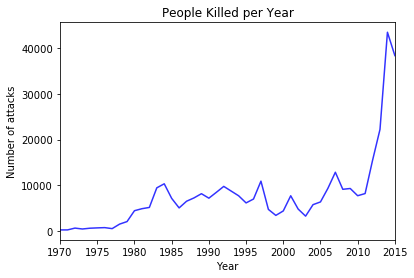

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
data.groupby('iyear').nkill.sum().plot(kind="line", color='b', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('People Killed per Year')

### Part Two: 1993

The year 1993 is missing from our dataset! Given there is a wealth of information across different types of attacks, we will focus analysis on `attacktype1` bombings (category 3, as per the codebook)

For this section, you should determine a methodology that allows you to best fill in the missing values. 

In [12]:
data_1993 = data[['Date', 'region_txt','latitude', 'longitude',
                  'attacktype1_txt', 'nwound', 'targtype1_txt', 'nkill', 'gname']]

In [13]:
data_1993.head()

,Date,region_txt,latitude,longitude,attacktype1_txt,nwound,targtype1_txt,nkill,gname
5,1970-01-01,North America,37.005105,-89.176269,Armed Assault,0.0,Police,0.0,Black Nationalists
6,1970-01-02,South America,-34.891151,-56.187214,Assassination,0.0,Police,0.0,Tupamaros (Uruguay)
7,1970-01-02,North America,37.805065,-122.273024,Bombing/Explosion,0.0,Utilities,0.0,Unknown
8,1970-01-02,North America,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,Military,0.0,New Year's Gang
9,1970-01-03,North America,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,Government (General),0.0,New Year's Gang


In [14]:
data_1993 = data_1993[data_1993.attacktype1_txt == 'Bombing/Explosion']

In [15]:
data_1993.index = data_1993.Date

In [16]:
data_1993['year'] = data_1993.index.year

In [17]:
abc = pd.get_dummies(data_1993.attacktype1_txt)
merge = pd.concat([data_1993, abc], axis=1)

In [18]:
merge = merge[['Date', 'Bombing/Explosion', 'year', 'region_txt']]

In [19]:
df = merge.groupby(['year']).sum()
df

,Bombing/Explosion
year,
1970,329.0
1971,233.0
1972,179.0
1973,143.0
1974,277.0
1975,353.0
1976,409.0
1977,621.0
1978,637.0


In [21]:
print "1993 Bombings", (1983+1736+1153+791)/4

1993 Bombings 1415


0.946414650503
0.889399366953


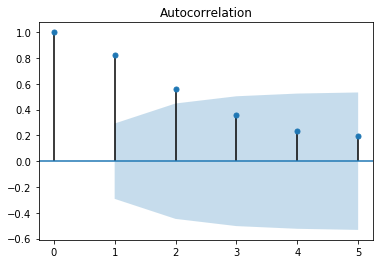

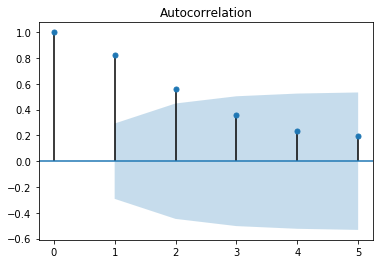

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
print df['Bombing/Explosion'].autocorr(lag=1)
print df['Bombing/Explosion'].autocorr(lag=2)
plot_acf(df, lags=5)

### Part Three: Bayesian Inference

Terror attacks are a ripe area of research for Bayesian inference. Given their infrequency, it is difficult for us to assume a high number of samples that approach some normal distribution.

Because of this, we should construct a prior about the amount of terror a given area has seen and update that prior with new information. 

Compare two populations using Bayesian inference. We want to know if the amount of terror one area has seen differs in a significant way than another area. 


For my Bayesian analysis I chose to analyze different offshoot groups of the IRA to see if they were statistically different. 

In [50]:
#making df for my populations of interest
cira = data[data.gname == 'Continuity Irish Republican Army (CIRA)'].iyear.value_counts().values
rira = data[data.gname == 'Real Irish Republican Army (RIRA)'].iyear.value_counts().values

In [51]:
df_ira = data[data.gname == 'Irish Republican Army (IRA)'] 
df_prior = df_ira[df_ira.iyear < 1995] #setting a df for the prior

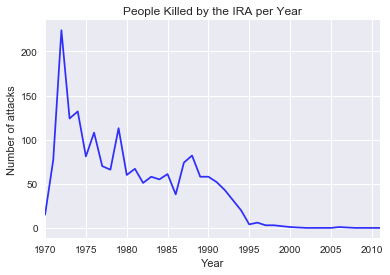

In [52]:
df_ira.groupby('iyear').nkill.sum().plot(kind="line", color='b', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('People Killed by the IRA per Year')

In [53]:
import pymc3 as pm
import pydot
import numpy as np
import seaborn as sns
%matplotlib inline

In [54]:
mean_prior_mean = df_prior.iyear.value_counts().mean()
mean_prior_std = df_prior.iyear.value_counts().std()

print mean_prior_mean
print mean_prior_std

108.458333333
49.0616109261


In [55]:
#make a model
with pm.Model() as model:

    cira_mean = pm.Normal('attacks_cira_mean', mean_prior_mean, sd=mean_prior_std)
    rira_mean = pm.Normal('attacks_rira_mean', mean_prior_mean, sd=mean_prior_std)

In [56]:
#setting a uniform dist for my standard deviation
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    cira_std = pm.Uniform('attacks_cira_std', lower=std_prior_lower, upper=std_prior_upper)
    rira_std = pm.Uniform('attacks_rira_std', lower=std_prior_lower, upper=std_prior_upper)

In [57]:
with model:

    grp_cira = pm.Normal('group_cira', mu=cira_mean, sd=cira_std, observed= cira)
    grp_rira = pm.Normal('group_rira', mu=rira_mean, sd=rira_std, observed= rira)

In [58]:
with model:

    diff_of_means = pm.Deterministic('mean_dif', rira_mean - cira_mean)
    diff_of_stds = pm.Deterministic('std_diff', rira_std - cira_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((rira_std**2 + cira_std**2) / 2))

In [59]:
with model:
    trace = pm.sample(20000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -145.96: 100%|██████████| 200000/200000 [00:18<00:00, 10539.35it/s]
Finished [100%]: Average ELBO = -144.31
100%|██████████| 20000/20000 [04:13<00:00, 78.82it/s] 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12e5d7a90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x126370750>], dtype=object)

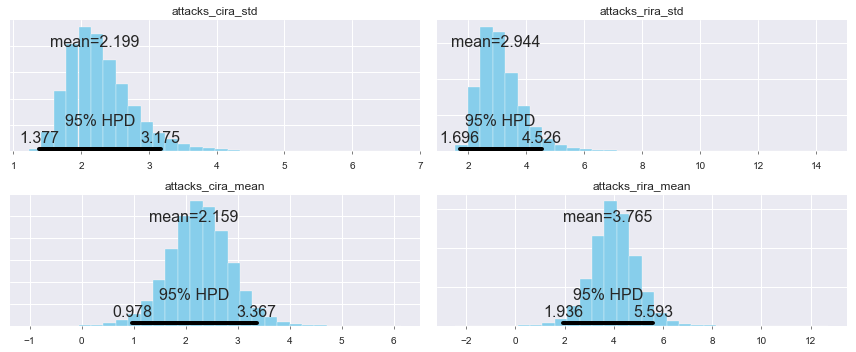

In [60]:
pm.plot_posterior(trace[3000:],
                  varnames=['attacks_cira_mean', 'attacks_rira_mean', 'attacks_cira_std', 'attacks_rira_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1234e4490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1264f0e10>], dtype=object)

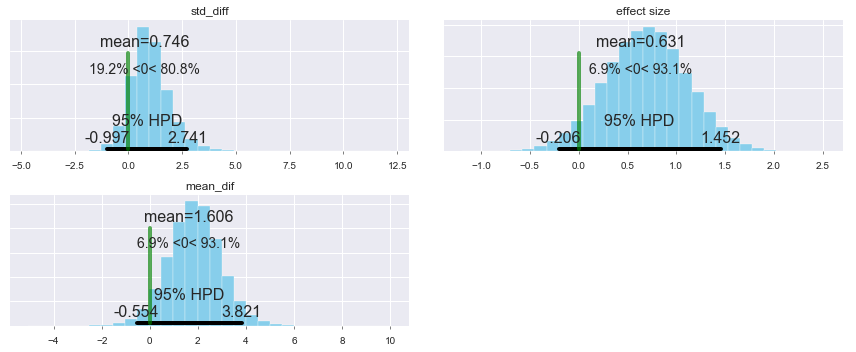

In [61]:
pm.plot_posterior(trace[3000:],
                  varnames=['mean_dif', 'std_diff', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [62]:
pm.summary(trace[3000:],
           varnames=['mean_dif', 'std_diff', 'effect size'])


mean_dif:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.606            1.102            0.004            [-0.554, 3.821]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.580         0.902          1.607          2.309          3.795


std_diff:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.746            0.951            0.008            [-0.997, 2.741]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.904         0.147          0.659          1.241          2.879


effect size:

  Mean             SD               MC Error         95% HPD interval
  -----------

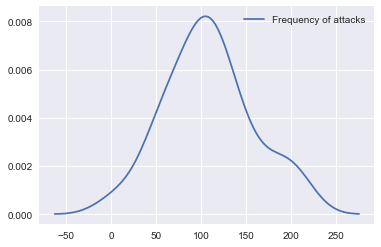

In [63]:
sns.kdeplot(df_prior.iyear.value_counts(), label='Frequency of attacks')